<a href="https://colab.research.google.com/github/nahin333/PyTorch_practice_code/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
 
torch.set_grad_enabled(True)
torch.set_printoptions(linewidth =120)
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
 
from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix
 
import pdb
 
#Note that pdb is the Python debugger

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [ ]:
#Downloading data from torchvision 
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



In [ ]:
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader)) # Getting a batch
images, labels = batch

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels) # Calculating the loss
 
loss.item()
 
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
 
get_num_correct(preds, labels)
#Calculating the Gradients
network.conv1.weight.grad
 
loss.backward() 
 
network.conv1.weight.grad.shape
 
#Updating the Weights
optimizer = optim.Adam(network.parameters(), lr=0.01)
optimizer.step() # Updating the weights
 
preds = network(images)
loss.item()

2.3061814308166504

In [ ]:
#Train Using a Single Batch
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
 
batch = next(iter(train_loader)) # Get Batch
images, labels = batch
 
preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss
 
loss.backward() # Calculate Gradients
optimizer.step() # Update Weights
 
print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.296379804611206
loss2: 2.2738616466522217


In [ ]:
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
 
total_loss = 0
total_correct = 0
 
for batch in train_loader: # Get Batch
    images, labels = batch 
 
    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss
 
    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights
 
    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)
    
print(
    "epoch:", 0, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch: 0 total_correct: 47741 loss: 327.3215499073267


In [ ]:
network = Network()
 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
 
for epoch in range(10):
    
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader: # Get Batch
        images, labels = batch 
 
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss
 
        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights
 
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
 
    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 47032 loss: 345.5766102671623
epoch 1 total_correct: 51463 loss: 232.38688251376152
epoch 2 total_correct: 52205 loss: 211.76239843666553
epoch 3 total_correct: 52564 loss: 201.58156116306782
epoch 4 total_correct: 52790 loss: 195.77403792738914
epoch 5 total_correct: 52966 loss: 192.6396942138672
epoch 6 total_correct: 53039 loss: 190.5702956020832
epoch 7 total_correct: 52966 loss: 191.72660824656487
epoch 8 total_correct: 53172 loss: 186.68215653300285
epoch 9 total_correct: 53243 loss: 184.0685821995139


In [ ]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch
 
        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

preds_correct = get_num_correct(train_preds, train_set.targets)
 
print('total correct:', preds_correct)
print('accuracy:', (preds_correct / len(train_set))*100,'%')

total correct: 52750
accuracy: 87.91666666666667 %


In [ ]:
train_set.targets
train_preds.argmax(dim=1)

stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)
 
stacked.shape

cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

cmt

tensor([[5638,    3,  112,  106,    6,    2,   89,    0,   44,    0],
        [  18, 5876,    7,   78,    4,    1,    9,    0,    7,    0],
        [ 101,    1, 4745,   41,  682,    2,  390,    0,   38,    0],
        [ 248,   35,   29, 5422,  188,    1,   70,    0,    6,    1],
        [  29,    9,  325,  189, 4790,    1,  624,    0,   33,    0],
        [  16,    0,    0,    0,    0, 5812,    0,   80,    0,   92],
        [1867,    7,  551,   95,  297,    0, 3107,    0,   76,    0],
        [   0,    0,    0,    0,    0,   79,    0, 5665,    1,  255],
        [  40,    2,   15,   12,    9,   16,   37,    7, 5858,    4],
        [   0,    0,    0,    3,    0,   15,    0,  143,    2, 5837]])

Text(0.5, 1.0, 'Confusion matrix')

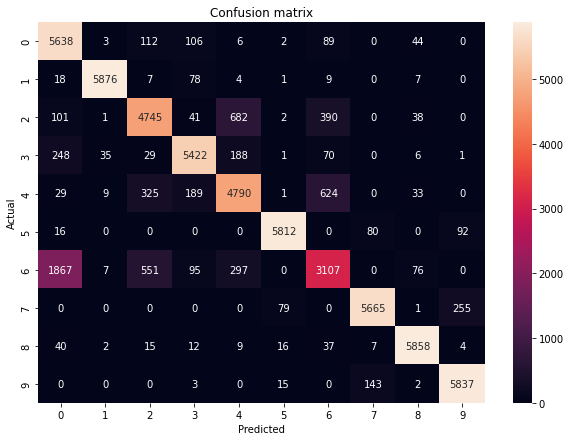

In [ ]:
plt.figure(figsize = (10, 7))
sn.heatmap(cmt, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix")

Confusion matrix, without normalization
tensor([[5638,    3,  112,  106,    6,    2,   89,    0,   44,    0],
        [  18, 5876,    7,   78,    4,    1,    9,    0,    7,    0],
        [ 101,    1, 4745,   41,  682,    2,  390,    0,   38,    0],
        [ 248,   35,   29, 5422,  188,    1,   70,    0,    6,    1],
        [  29,    9,  325,  189, 4790,    1,  624,    0,   33,    0],
        [  16,    0,    0,    0,    0, 5812,    0,   80,    0,   92],
        [1867,    7,  551,   95,  297,    0, 3107,    0,   76,    0],
        [   0,    0,    0,    0,    0,   79,    0, 5665,    1,  255],
        [  40,    2,   15,   12,    9,   16,   37,    7, 5858,    4],
        [   0,    0,    0,    3,    0,   15,    0,  143,    2, 5837]])


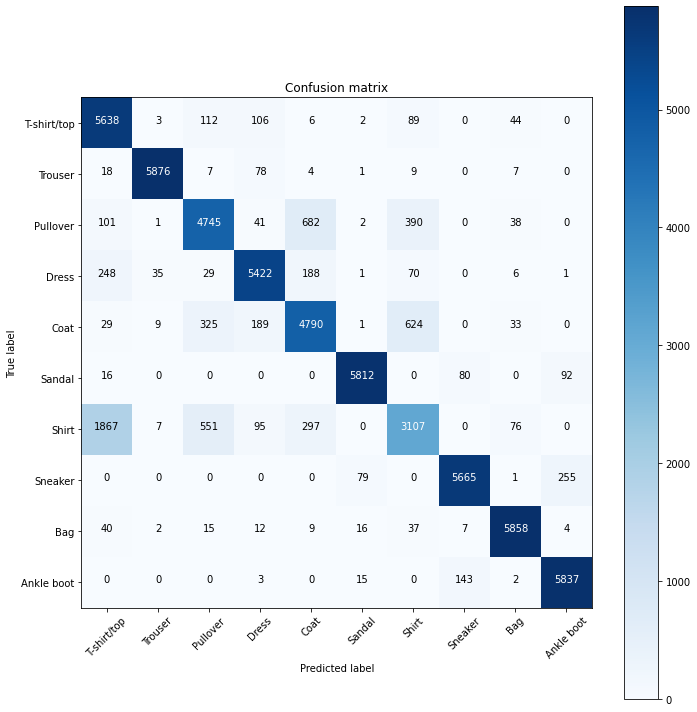

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cmt, names)